iter  633


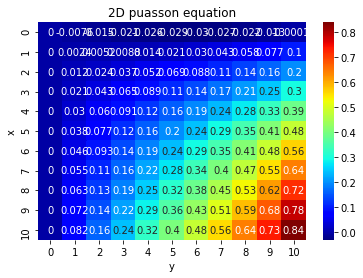

In [4]:
from math import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
n = 11
dx = 1.0 / (n - 1)
dy = 1.0 / (n - 1)
eps = 0.000000001
max_u = 1.
uold = np.zeros([n, n], dtype = float)
unew = np.zeros([n, n], dtype = float)
f = np.zeros([n, n], dtype = float)
it = 0    

for i in range(n) : 
    for j in range(n) : 
        x = i * dx
        y = j * dy
        f[i][j] = -sin(x * y) * (x ** 2 + y ** 2)
        
        
while max_u > eps :

    # x
    for i in range(n) : 
        uold[i][0] = 0
        uold[i][n-1] = sin(i*dx)
        unew[i][0] = 0
        unew[i][n-1] = sin(i*dx)

    # y 
    for j in range(n) : 
        uold[0][j] = uold[1][j] - j * dy * dx 
        uold[n-1][j] = uold[n-2][j] + dx * j * dy * cos(j * dy) 
        unew[0][j] = unew[1][j] - j * dy * dx 
        unew[n-1][j] = unew[n-2][j] + dx * j * dy * cos(j * dy)

# while it < 1000:
    
    for i in range(1, n-1):
        for j in range(1, n-1):
            unew[i][j] = 0.25 * (uold[i + 1][j] + uold[i - 1][j] + uold[i][j + 1] + uold[i][j - 1] + f[i][j] * dx * dy)

    # x
    for i in range(n) : 
        uold[i][0] = 0
        uold[i][n-1] = sin(i*dx)
        unew[i][0] = 0
        unew[i][n-1] = sin(i*dx)

    # y 
    for j in range(n) : 
        uold[0][j] = uold[1][j] - j * dy * dx 
        uold[n-1][j] = uold[n-2][j] + dx * j * dy * cos(j * dy) 
        unew[0][j] = unew[1][j] - j * dy * dx 
        unew[n-1][j] = unew[n-2][j] + dx * j * dy * cos(j * dy)
                 
    max_u = 0.
    
    for i in range(n) :
        for j in range(n) :
            if max_u < fabs(unew[i][j] - uold[i][j]) :
                max_u = fabs(unew[i][j] - uold[i][j])

    it += 1   
      
    for i in range(n) :
        for j in range(n):
            uold[i][j] = unew[i][j] 
             
            
print('iter ',it)                
# Fout = open("D:/buRR.dat", "w")
# Fout.write("VARIABLES = \"X\",\"Y\",\"u\",\"v\"\n")
# Fout.write("ZONE I=11,J=11, F=POINT\n")
          
# for i in range(n):
#     for j in range(n):
#         w = str(i * dx) + " " + str(j * dy) + " " + str(unew[i][j]) + " " + str(vnew[i][j])
#         Fout.write(w + "\n")
#         print(str(i * dx) + " " + str(j * dy) + " " + str(unew[i][j]) + " " + str(vnew[i][j]))
        
df = pd.DataFrame(unew)

sns.heatmap(df, annot = True, cmap = 'jet')
plt.xlabel('y')
plt.ylabel('x')
plt.title('2D puasson equation')
plt.savefig('heat.png')
# Fout.close()

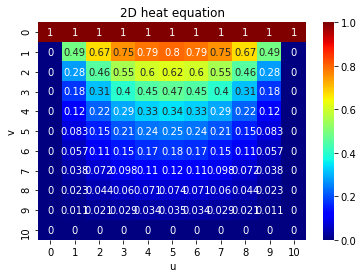

In [8]:
from math import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
n = 11
dx = 1.0 / (n - 1)
dy = 1.0 / (n - 1)
eps = 0.000000001
max_v = 1.
max_u = 1.
uold = np.zeros([n, n], dtype = float)
unew = np.zeros([n, n], dtype = float)
f = np.zeros([n, n], dtype = float)
it = 0    

while (max_v > eps or max_u > eps) and it < 1000 :

    # x
    for i in range(n) : 
        uold[i][0] = 0.0
        uold[i][n-1] = 0.0
        unew[i][0] = 0.0
        unew[i][n-1] = 0.0

    # y 
    for j in range(n) : 
        uold[0][j] = 1.0 
        uold[n-1][j] = 0.0 
        unew[0][j] = 1.0 
        unew[n-1][j] = 0.0

# while it < 1000:
    
    for i in range(1, n-1):
        for j in range(1, n-1):
            unew[i][j] = 0.25 * (uold[i + 1][j] + uold[i - 1][j] + uold[i][j + 1]\
                                             + uold[i][j - 1] + f[i][j] * dx * dy)

    # x
    for i in range(n) : 
        uold[i][0] = 0.0
        uold[i][n-1] = 0.0
        unew[i][0] = 0.0
        unew[i][n-1] = 0.0

    # y 
    for j in range(n) : 
        uold[0][j] = 1.0 
        uold[n-1][j] = 0.0 
        unew[0][j] = 1.0 
        unew[n-1][j] = 0.0
                 
    max_u = 0.
    
    for i in range(n) :
        if max_u < fabs(unew[i][j] - uold[i][j]) :
            max_u = fabs(unew[i][j] - uold[i][j])
     
    it += 1   
      
    for i in range(n) :
        for j in range(n):
            uold[i][j] = unew[i][j] 
             
            
# print('iter ',it)                
# Fout = open("D:/buRR.dat", "w")
# Fout.write("VARIABLES = \"X\",\"Y\",\"u\",\"v\"\n")
# Fout.write("ZONE I=11,J=11, F=POINT\n")
          
# for i in range(n):
#     for j in range(n):
#         w = str(i * dx) + " " + str(j * dy) + " " + str(unew[i][j]) + " " + str(vnew[i][j])
#         Fout.write(w + "\n")
#         print(str(i * dx) + " " + str(j * dy) + " " + str(unew[i][j]) + " " + str(vnew[i][j]))
        

df = pd.DataFrame(unew)

sns.heatmap(df, annot = True, cmap = 'jet')
plt.xlabel('u')
plt.ylabel('v')
plt.title('2D heat equation')
plt.savefig('heat.png')
# Fout.close()